In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import sklearn as skl
import tensorflow as tf 

<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

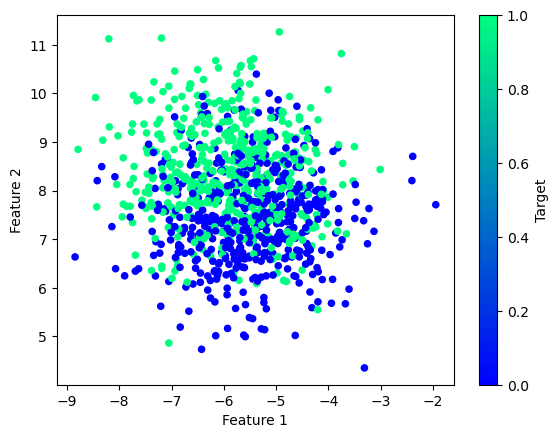

In [2]:
# Generate Dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=5)

#creating a dataframe with dummy data
df = pd.DataFrame(X, columns=['Feature 1','Feature 2'])
df['Target'] = y 

# Plotting the dummy data
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, stratify=y)

In [4]:
scl = skl.preprocessing.StandardScaler()
X_scaler = scl.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# create keras model
nn_model = tf.keras.models.Sequential()

In [6]:
# add our first dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [7]:
# add the output 
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [8]:
# check the structure of the sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile the sequential model together and customize the metrics 
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=300)

Epoch 1/300
24/24 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.5640
Epoch 2/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5680
Epoch 3/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5787
Epoch 4/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5827
Epoch 5/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5933
Epoch 6/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6053
Epoch 7/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6040
Epoch 8/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.6093
Epoch 9/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.6160
Epoch 10/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.6320
Epoch 11/

In [11]:
def get_accuracy_loss(model):
    model_df = pd.DataFrame(model.history, index=range(1,len(model.history['loss'])+1))

    plt.subplots()
    plt.plot(model_df, label=['loss','accuracy'])
    plt.legend()
    plt.show()

    return model_df

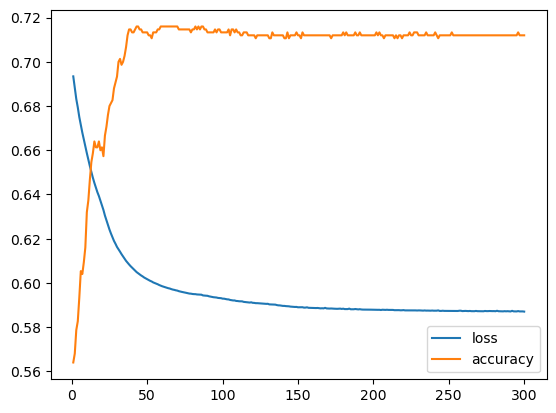

In [12]:
history_model_df = get_accuracy_loss(fit_model)

In [13]:
# evaluate the model
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8/8 - 0s - loss: 0.5998 - accuracy: 0.6680 - 154ms/epoch - 19ms/step
Loss: 0.5998218655586243, Accuracy: 0.6679999828338623


In [14]:
new_X, new_Y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=5)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype('int32') 

4/4 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
    

<AxesSubplot: xlabel='feature_1', ylabel='feature_2'>

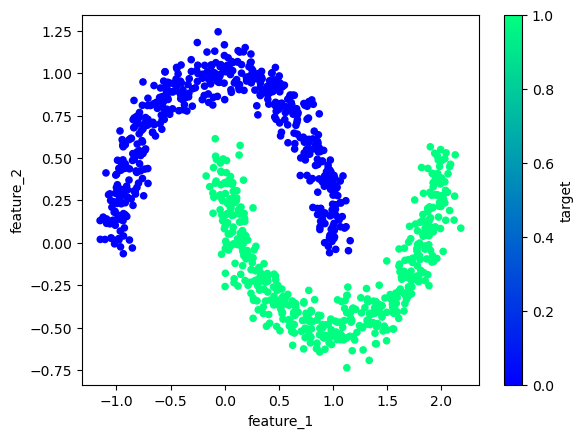

In [15]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=9)

y_moons = y_moons.reshape(-1,1)

df_moons = pd.DataFrame(X_moons, columns=['feature_1','feature_2'])
df_moons['target'] = y_moons

df_moons.plot.scatter(x='feature_1',y='feature_2', c='target',colormap='winter')

In [16]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=29)

moon_scaler = skl.preprocessing.StandardScaler()
X_moon_scaler = moon_scaler.fit(X_moon_train)
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2664 - accuracy: 0.1213
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1322 - accuracy: 0.1440
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0286 - accuracy: 0.1760
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9371 - accuracy: 0.2253
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8406 - accuracy: 0.3053
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7570 - accuracy: 0.4440
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5640
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6093
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.6560
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7000
Epoch 11/

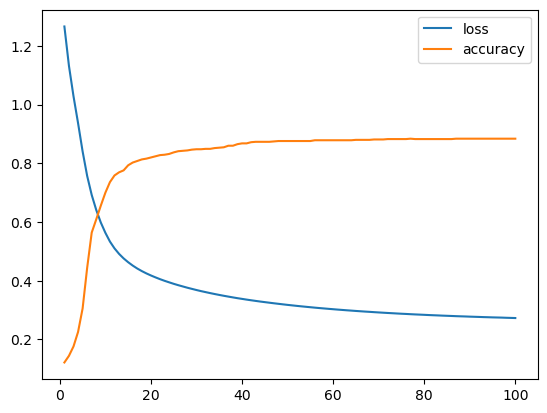

In [18]:
moon_history_df = get_accuracy_loss(model_moon)

In [19]:
# generate our new sequential model
new_model = tf.keras.models.Sequential()

In [20]:
# add input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

#add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [21]:
# Compile the sequential model together and customize metrics
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.8547
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5128 - accuracy: 0.8547
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.8600
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.8640
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.8653
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.8627
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8640
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8627
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8627
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8640
Epoch 11/

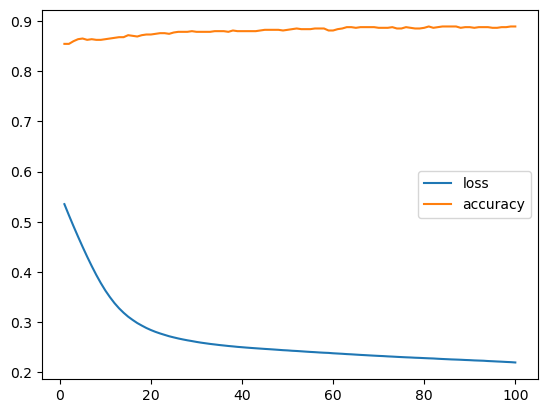

In [22]:
new_fit_model_df = get_accuracy_loss(new_fit_model)